In [1]:
# A notebook for simple lstm exploration
# Case of single lstm cell
from peratouch.data import Data 
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import lstm
from peratouch.config import datapath_five_users

input_size = 4 
D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()

Train, test and validation arrays normalized to:
[1.], [0.9996], [1.002]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (114056, 1, 32) 
Labels shape:  (114056,) 
Shape of test set: (11406, 8, 4) 
Shape of train set: (91244, 8, 4) 
Shape of validation set: (11406, 8, 4) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.22, 0.18, 0.21, 0.22, 0.17] 
Fraction of train labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32


End of epoch 1: loss_tr=1.563, loss_val=1.563, train=37.9%, val=37.9%
End of epoch 3: loss_tr=1.343, loss_val=1.345, train=45.8%, val=45.6%
End of epoch 5: loss_tr=1.223, loss_val=1.221, train=50.9%, val=51.1%
End of epoch 7: loss_tr=1.159, loss_val=1.153, train=52.8%, val=53.2%
End of epoch 9: loss_tr=1.134, loss_val=1.126, train=53.8%, val=54.0%
End of epoch 11: loss_tr=1.124, loss_val=1.117, train=54.1%, val=54.6%
End of epoch 13: loss_tr=1.129, loss_val=1.124, train=55.4%, val=56.1%
End of epoch 15: loss_tr=1.086, loss_val=1.076, train=57.1%, val=57.8%
End of epoch 17: loss_tr=1.078, loss_val=1.069, train=57.4%, val=57.7%
End of epoch 19: loss_tr=1.070, loss_val=1.059, train=57.9%, val=58.6%

Training Complete!
Loading best weights for lowest validation loss=1.059 ...

Average running time per epoch: 1.90 seconds
Total running time: 36.09 seconds

Test dataset metrics:
Overall Accuracy = 57.9%, Matthews Corr Coef = 0.47


              precision    recall  f1-score   support

     

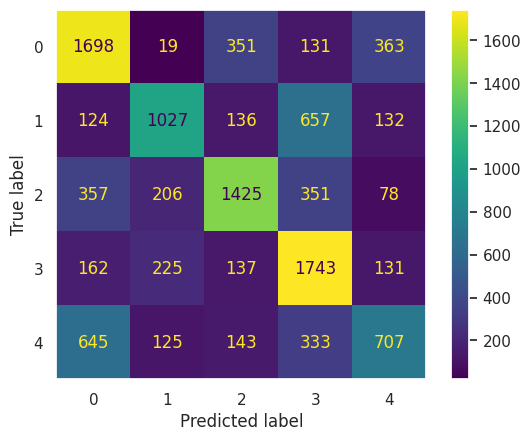

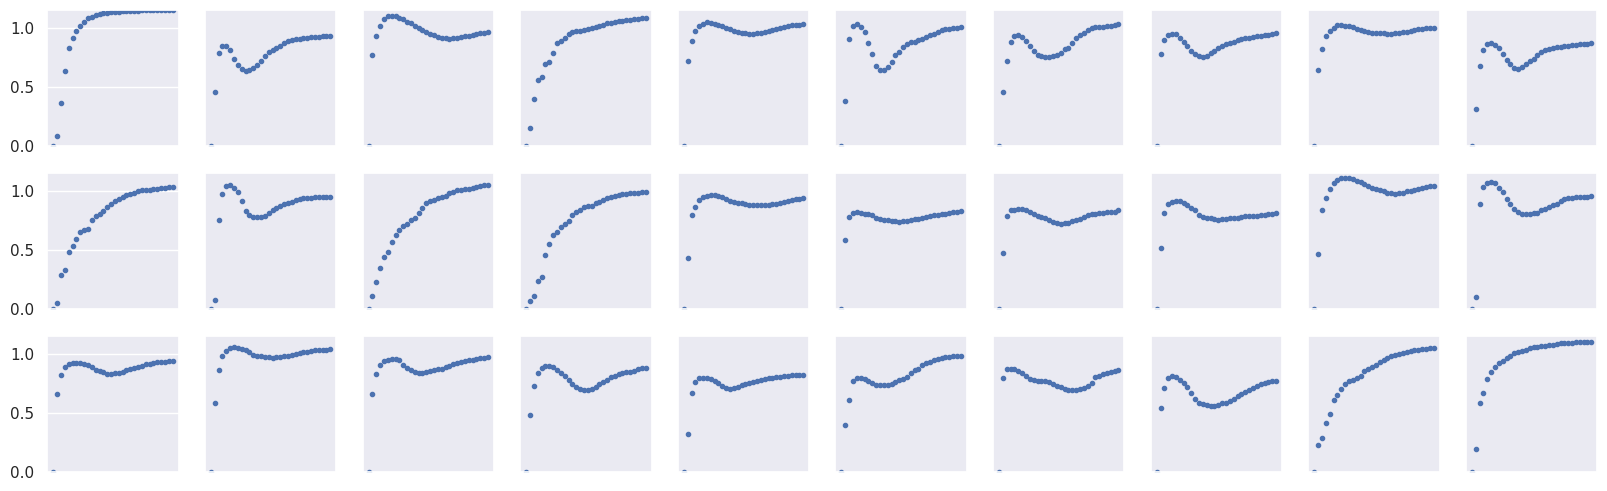

In [2]:
model = lstm(input_size=input_size, hidden_size=16, out_size=5, global_pool=True) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=5000, max_epochs=20, verbose=True)
T.train_model(model)

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

In [3]:
# Look at 3 triggers
from peratouch.data import Data 
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import lstm
from peratouch.config import datapath_five_users

input_size = 32 
D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()

Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9991 1.0002 1.0004], [1.0019 1.0013 1.0018]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (114041, 3, 32) 
Labels shape:  (114041,) 
Shape of test set: (11404, 3, 32) 
Shape of train set: (91232, 3, 32) 
Shape of validation set: (11405, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32


End of epoch 1: loss_tr=1.281, loss_val=1.284, train=45.0%, val=45.2%
End of epoch 4: loss_tr=1.035, loss_val=1.032, train=58.7%, val=58.8%
End of epoch 7: loss_tr=1.002, loss_val=0.998, train=61.5%, val=62.1%
End of epoch 10: loss_tr=0.960, loss_val=0.955, train=62.1%, val=62.7%
End of epoch 13: loss_tr=0.952, loss_val=0.944, train=62.5%, val=62.6%
End of epoch 16: loss_tr=0.939, loss_val=0.931, train=63.0%, val=63.4%
End of epoch 19: loss_tr=0.906, loss_val=0.898, train=64.7%, val=65.3%
End of epoch 22: loss_tr=0.969, loss_val=0.968, train=61.2%, val=61.4%
End of epoch 25: loss_tr=0.918, loss_val=0.912, train=64.1%, val=64.7%
End of epoch 28: loss_tr=0.884, loss_val=0.879, train=66.0%, val=66.3%

Training Complete!
Loading best weights for lowest validation loss=0.879 ...

Average running time per epoch: 1.00 seconds
Total running time: 28.99 seconds

Test dataset metrics:
Overall Accuracy = 66.9%, Matthews Corr Coef = 0.59


              precision    recall  f1-score   support

   

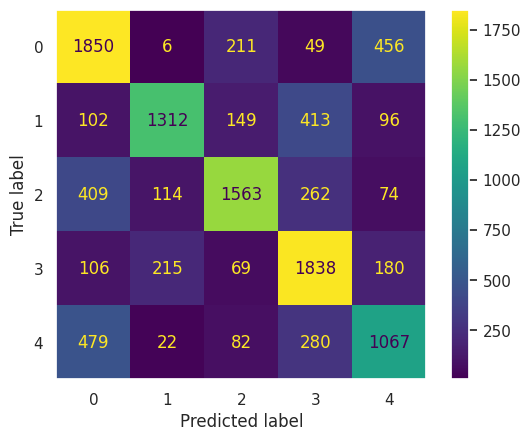

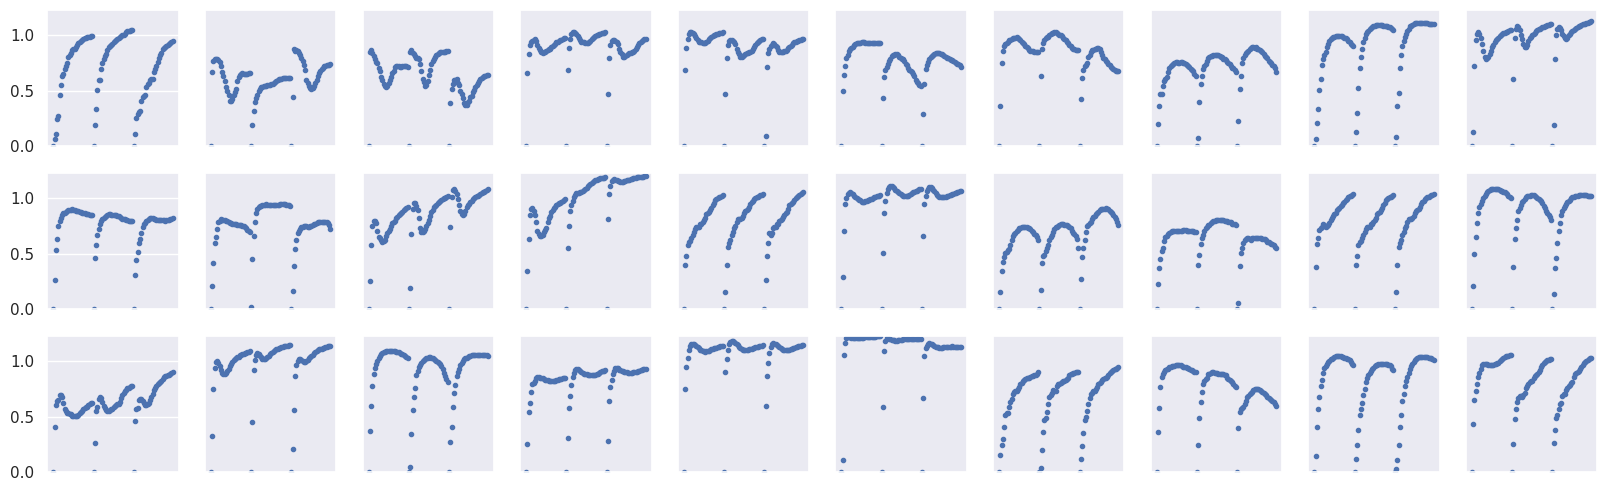

In [4]:
model = lstm(input_size=input_size, hidden_size=int(input_size/2), out_size=5, dropout=0) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=5000, max_epochs=30)
T.train_model(model)

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()